# Zoom In Images Project


# Importing Libraries


In [55]:
import numpy as np
from numpy.fft import fft2, fftshift, ifft2, ifftshift
import os
import matplotlib.pyplot as plt
from PIL import Image
from cv2 import resize

# Main


## Image loading


In [56]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "barbara.jpg" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [57]:
image = Image.open(filepath).convert('L')
image = np.array(image)

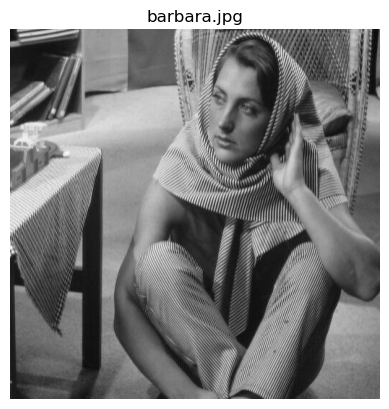

In [58]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(FILENAME)
plt.show()

## Image resizing (Half Size)


### Subsampling


In [59]:
subsampledImage = image[::2, ::2] #We keep one every second pixel 

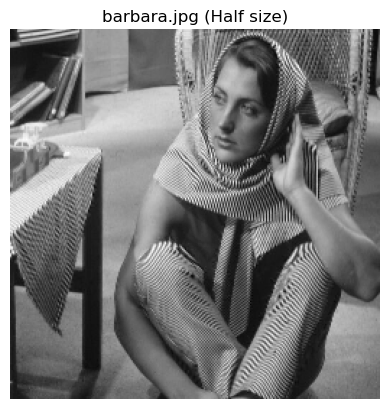

In [60]:
plt.imshow(subsampledImage, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Half size)")
plt.show()

### Fourier domain resizing


In [61]:
fftImage = fftshift(fft2(image))

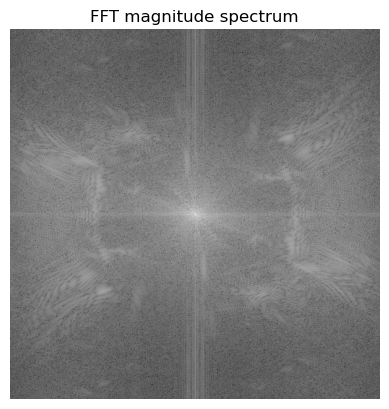

In [62]:
logMagnitudeSpectrum = np.log1p(abs(fftImage))

plt.imshow(logMagnitudeSpectrum, cmap='gray')
plt.title('FFT magnitude spectrum')
plt.axis('off')
plt.show()

In [63]:
fftImageDownsized = fftImage[fftImage.shape[0] // 4 : 3 * fftImage.shape[0] // 4, fftImage.shape[1] // 4 : 3 * fftImage.shape[1] // 4]

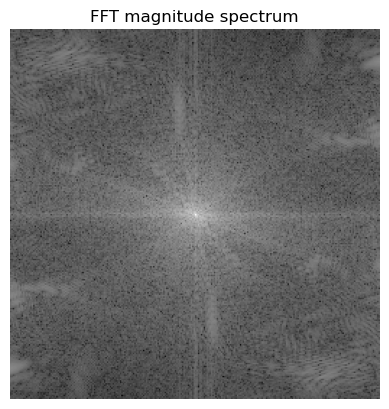

In [64]:
logMagnitudeSpectrumDownsized = np.log1p(abs(fftImageDownsized))

plt.imshow(logMagnitudeSpectrumDownsized, cmap='gray')
plt.title('FFT magnitude spectrum')
plt.axis('off')
plt.show()

In [65]:
fftImageDownsized.shape

(256, 256)

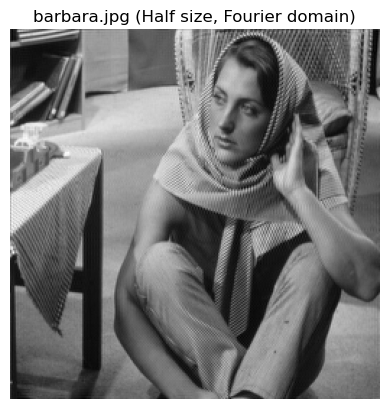

In [66]:
downsizedImage = abs(ifft2(fftImageDownsized))

plt.imshow(downsizedImage, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Half size, Fourier domain)")
plt.show()

## Image resizing (Double Size)


### FFT Domain


In [67]:
fftUpscaled = np.pad(fftImage, fftImage.shape[0] //2)

In [68]:
fftUpscaled.shape

(1024, 1024)

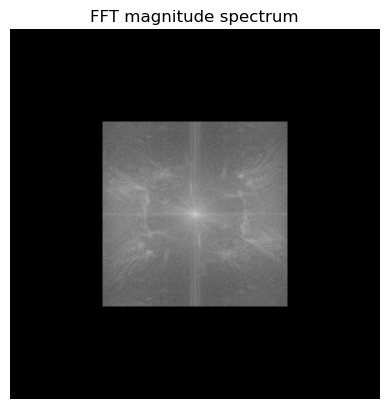

In [69]:
logMagnitudeSpectrumUpscaled = np.log1p(abs(fftUpscaled))

plt.imshow(logMagnitudeSpectrumUpscaled, cmap='gray')
plt.title('FFT magnitude spectrum')
plt.axis('off')
plt.show()

In [70]:
upscaledImage = abs(ifft2(fftUpscaled))

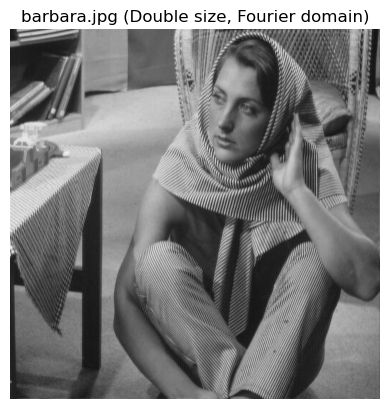

In [71]:
upscaledImage = abs(ifft2(fftUpscaled))

plt.imshow(upscaledImage, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Double size, Fourier domain)")
plt.show()

### Linear Interpolation


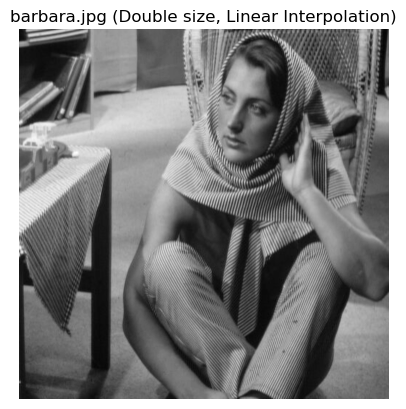

In [72]:
upscaledImageLinear = resize(image, None, fx=2, fy=2)

plt.imshow(upscaledImageLinear, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Double size, Linear Interpolation)")
plt.show()